# Fastai Quick Start

In [1]:
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *

## Computer vision classification

In [3]:
path = untar_data(URLs.PETS) / "images"


def is_cat(x):
    return x[0].isupper()


dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct=0.2,
    seed=42,
    label_func=is_cat,
    item_tfms=Resize(224),
)

learn = vision_learner(dls, resnet34, metrics=error_rate)

/home/ming-chen/.cache/pypoetry/virtualenvs/ming-jupyternb-GLHjeNiZ-py3.11/lib/python3.11/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(col):


/home/ming-chen/.cache/pypoetry/virtualenvs/ming-jupyternb-GLHjeNiZ-py3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ming-chen/.cache/pypoetry/virtualenvs/ming-jupyternb-GLHjeNiZ-py3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.059904,0.028243,0.010149,00:16


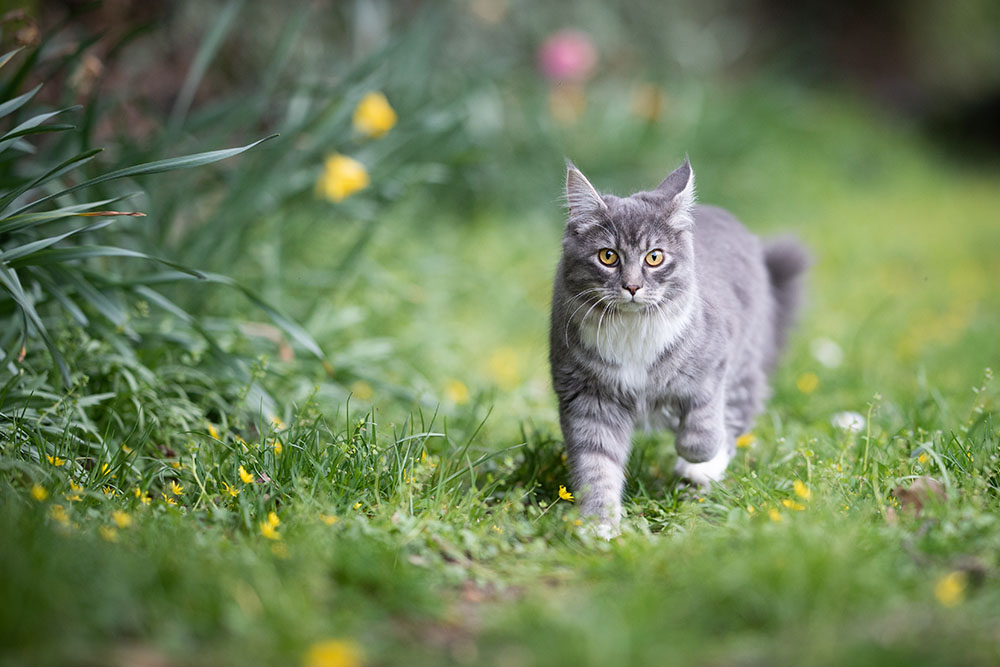

In [7]:
img = PILImage.create('images/cat.jpg')
img

In [8]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


## Computer vision segmentation

In [5]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path,
    bs=8,
    fnames=get_image_files(path / "images"),
    label_func=lambda o: path / "labels" / f"{o.stem}_P{o.suffix}",
    codes=np.loadtxt(path / "codes.txt", dtype=str),
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)


epoch,train_loss,valid_loss,time
0,3.062815,2.631128,00:01


epoch,train_loss,valid_loss,time
0,2.070967,1.680795,00:01
1,1.703942,1.270444,00:01
2,1.486391,1.006052,00:01
3,1.293587,0.856659,00:01
4,1.145634,0.826521,00:01
5,1.033777,0.718829,00:01
6,0.940562,0.701975,00:01
7,0.870945,0.690648,00:01


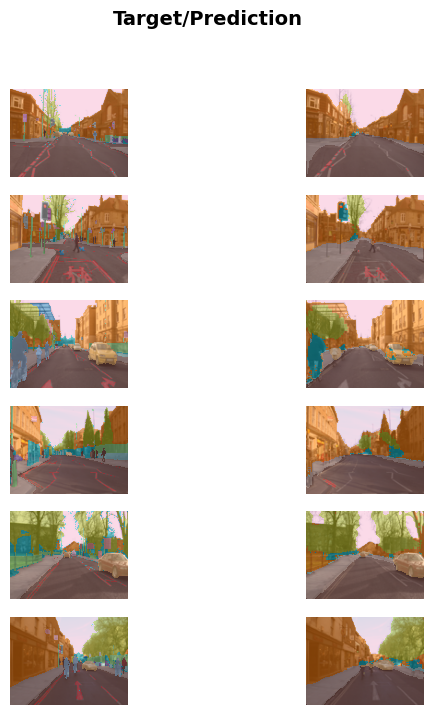

In [6]:
learn.show_results(max_n=6, figsize=(7,8))

TypeError: unsupported format string passed to TensorBase.__format__

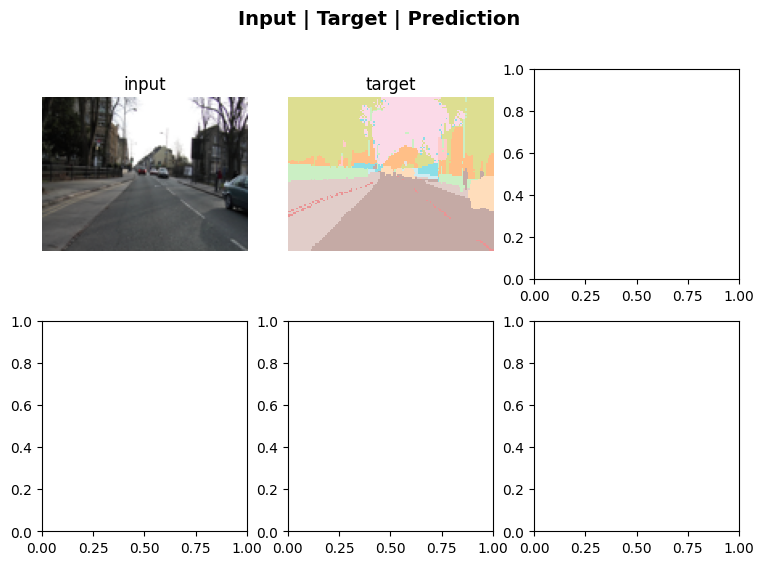

In [7]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=2)

## Natural language processing

In [9]:
torch.cuda.empty_cache()

In [8]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(2, 1e-2)

/home/ming-chen/.cache/pypoetry/virtualenvs/ming-jupyternb-GLHjeNiZ-py3.11/lib/python3.11/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(col):


epoch,train_loss,valid_loss,accuracy,time
0,0.468466,0.401565,0.818520,01:06


epoch,train_loss,valid_loss,accuracy,time


OutOfMemoryError: CUDA out of memory. Tried to allocate 132.00 MiB (GPU 0; 7.78 GiB total capacity; 6.97 GiB already allocated; 3.06 MiB free; 7.21 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
learn.predict("I really liked that movie!")

## Tabular

In [2]:
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(2)

/home/ming-chen/.cache/pypoetry/virtualenvs/ming-jupyternb-GLHjeNiZ-py3.11/lib/python3.11/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(col):
/home/ming-chen/.cache/pypoetry/virtualenvs/ming-jupyternb-GLHjeNiZ-py3.11/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(c):
/home/ming-chen/.cache/pypoetry/virtualenvs/ming-jupyternb-GLHjeNiZ-py3.11/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(c):
/home/ming-chen/.cache/pypoetry/virtualenvs/ming-jupyternb-GLHjeNiZ-py3.11/lib/pytho

epoch,train_loss,valid_loss,accuracy,time
0,0.382120,0.370952,0.827856,00:01
1,0.357832,0.353332,0.837991,00:01


## Recommendation systems

In [3]:
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(6)

/home/ming-chen/.cache/pypoetry/virtualenvs/ming-jupyternb-GLHjeNiZ-py3.11/lib/python3.11/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(col):
/home/ming-chen/.cache/pypoetry/virtualenvs/ming-jupyternb-GLHjeNiZ-py3.11/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(c):


epoch,train_loss,valid_loss,time
0,1.532564,1.353488,00:00


epoch,train_loss,valid_loss,time
0,1.356359,1.273375,00:00
1,1.193876,0.986334,00:00
2,0.917577,0.762726,00:00
3,0.758420,0.703007,00:00
4,0.693440,0.689909,00:00
5,0.672866,0.688281,00:00


In [4]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,70.0,93.0,5.0,4.231381
1,58.0,76.0,5.0,3.611279
2,4.0,83.0,3.5,4.177122
3,63.0,94.0,1.5,2.949933
4,30.0,34.0,5.0,3.785887
5,99.0,59.0,3.5,4.092997
6,98.0,13.0,4.0,3.722904
7,33.0,57.0,4.5,3.959138
8,71.0,86.0,4.0,4.093514
